In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Classification des avions selon la pollution sonore

In [2]:
# Load the data
data = pd.read_csv('all_data_toulouse.csv')      #unzip file all_data_toulouse.rar in the folder Data/data_toulouse

In [3]:
bins = [-float('inf'),0,30,60,float('inf')]
labels = ["bruit très faible","bruit faible","bruit moyen","bruit élevé"]
bins = pd.cut(data['indice_sonore'], bins=bins, labels=labels)
grouped = data.groupby(bins).agg(lambda x: x.tolist())

In [4]:
grouped['age_avion'][1] =[2013]
grouped['nombre_passagers'][1] =[224]

In [5]:
grouped = grouped.filter(items = ['indice_sonore', 'age_avion', 'nombre_passagers'], axis=1)

In [6]:
grouped['age_avion'] = grouped['age_avion'].apply(lambda x: [i for i in x if not pd.isnull(i)])
grouped['nombre_passagers'] = grouped['nombre_passagers'].apply(lambda x: [i for i in x if not pd.isnull(i)])

In [8]:
grouped['indice_sonore'] = grouped['indice_sonore'].apply(lambda x: np.mean(x))

c:\Users\chell\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [9]:
grouped['nombre_passagers']=grouped['nombre_passagers'].apply(lambda x: (np.mean(x)))
grouped['age_avion']= grouped['age_avion'].apply(lambda x: (np.mean(x)))

In [10]:
grouped

,indice_sonore,age_avion,nombre_passagers
indice_sonore,,,
bruit très faible,NaN,NaN,NaN
bruit faible,23.763098,2013.000000,224.000000
bruit moyen,41.780316,2004.571429,100.200000
bruit élevé,79.067906,1983.928606,129.539013


In [11]:
# boucle sur les lignes non nulles
for index, row in grouped.dropna().iterrows():
    grouped.age_avion[index] = int(2023 - grouped.age_avion[index])
    grouped.nombre_passagers[index]  = int(grouped.nombre_passagers[index] )
grouped = grouped.rename(columns={'nombre_passagers': 'nombre_sièges'})
grouped = grouped.rename(columns={'age_avion': 'age_moyen_avion'})

In [12]:
grouped

,indice_sonore,age_moyen_avion,nombre_sièges
indice_sonore,,,
bruit très faible,NaN,NaN,NaN
bruit faible,23.763098,10.0,224.0
bruit moyen,41.780316,18.0,100.0
bruit élevé,79.067906,39.0,129.0


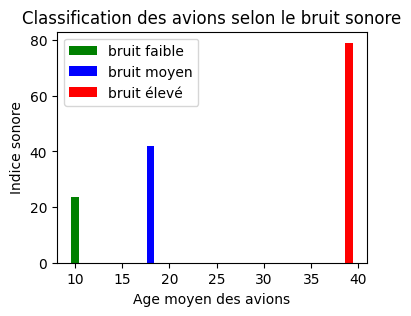

In [14]:
colors = {"bruit faible": ('g'), "bruit moyen": ('b'), "bruit élevé": ('r')}

# Plot des résultats avec coloration selon le cluster
plt.figure(figsize=(4, 3))
for index,row in grouped.dropna().iterrows():
    plt.bar(grouped.age_moyen_avion[index], grouped.indice_sonore[index],color = colors[index], label=index)

plt.title('Classification des avions selon le bruit sonore')
plt.xlabel('Age moyen des avions')
plt.ylabel('Indice sonore')
plt.legend()
